In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\karth\OneDrive\Desktop\csv files\Dataset-main\winequalityN.csv")

In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [12]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

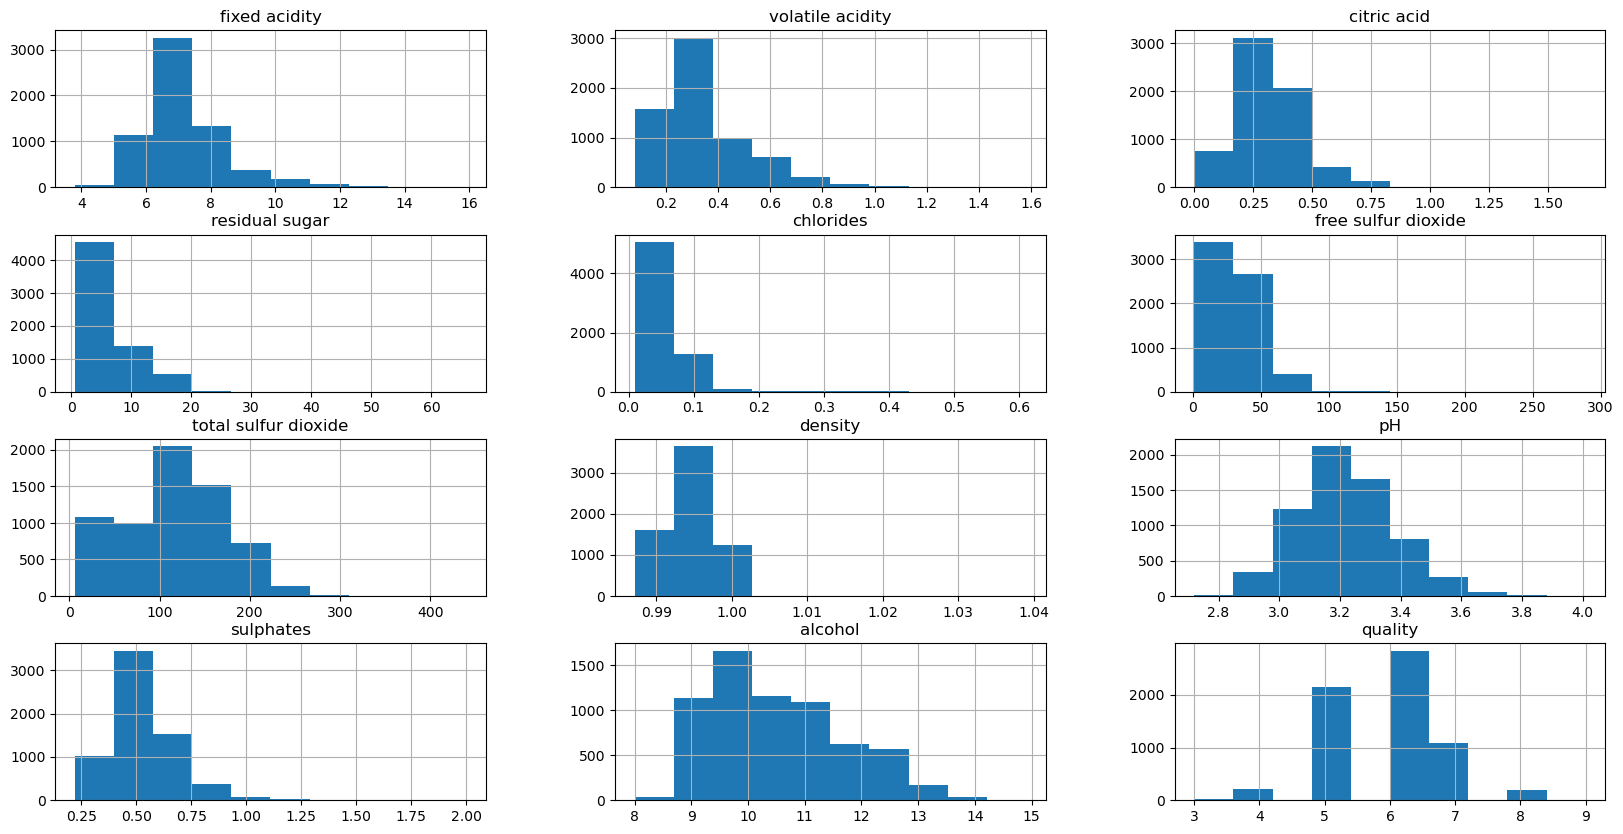

In [14]:
df.hist(figsize=(20, 10))

In [15]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

In [16]:
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219918     0.323349   
volatile acidity           0.219918          1.000000    -0.377759   
citric acid                0.323349         -0.377759     1.000000   
residual sugar            -0.112219         -0.196578     0.142451   
chlorides                  0.298282          0.377122     0.039310   
free sulfur dioxide       -0.283237         -0.353055     0.133426   
total sulfur dioxide      -0.329409         -0.414706     0.195148   
density                    0.458941          0.271107     0.096307   
pH                        -0.251683          0.260283    -0.328354   
sulphates                  0.300225          0.225313     0.057564   
alcohol                   -0.095560         -0.038215    -0.010431   
quality                   -0.076967         -0.265838     0.085699   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

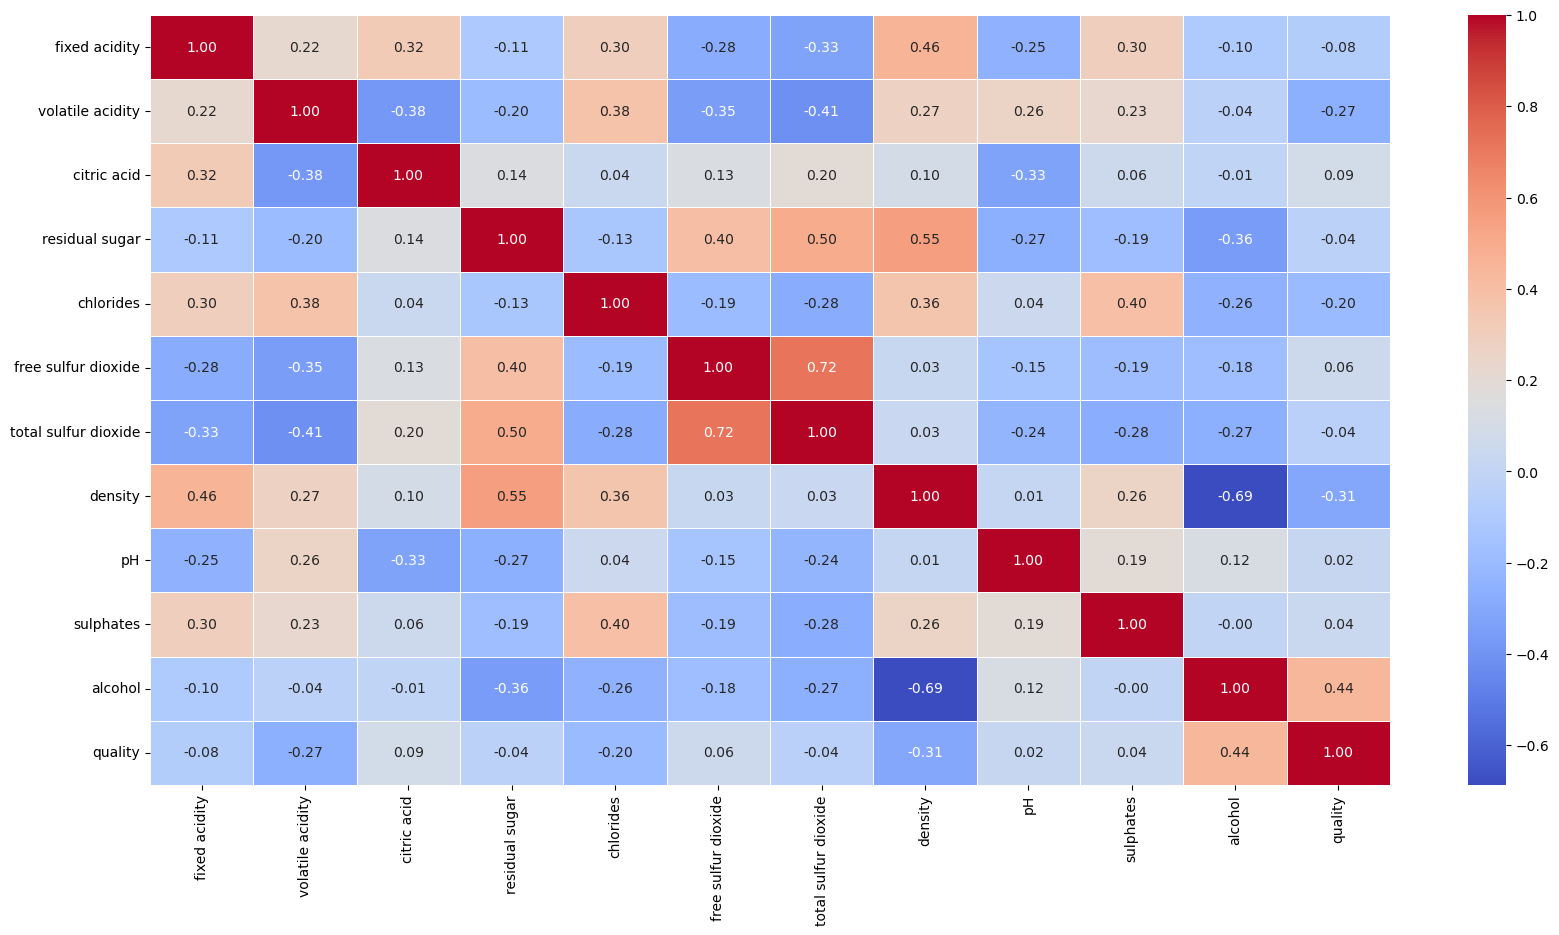

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [20]:
df.quality.unique() #array([6, 5, 7, 8, 4, 3, 2,])

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [21]:
df['best quality'] = [1 if x > 5 else 0 for x in df['quality']]

In [22]:
df = df.drop(columns='quality')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [33]:
y = df['best quality']
X = df.drop(columns='best quality')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)
X_train.shape, X_test.shape # (5197, 12), (1300, 12))

((5197, 12), (1300, 12))

In [34]:
# applying minimaxscale
from sklearn.preprocessing import MinMaxScaler

In [35]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

In [36]:
#applying logisticregression
from sklearn.linear_model import LogisticRegression

In [37]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score
lr_prediction

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [38]:

lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_accuracy 

0.7469230769230769

In [39]:
#applying boosting method
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_prediction = XGB_model.predict(X_test)
XGB_prediction

array([1, 0, 1, ..., 0, 0, 1])

In [40]:
XGB_accuracy = accuracy_score(y_test, XGB_prediction)
XGB_accuracy 

0.6746153846153846

In [41]:
# importing SVC
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_prediction)

svc_accuracy

0.7407692307692307